<a href="https://colab.research.google.com/github/vaskonvas/iCNN/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 1: Principal Component Analysis (PCA)**

Principal component analysis is a dimensionality reduction technique, aiming to reduce the dimensions by projecting the data to orthogonal axes of a lower dimensional space that maximize the variance of the data. The dimensionality reduction is implemented in an unsupervised manner, i.e. without taking into consideration the labels of the data. PCA is a linear transformation, meaning that the new coordinates in the space of lower dimensionality are a linear combination of the initial coordinates. 

Note: PCA keeps the most essential, common information amongst the data and not the most discriminative information.



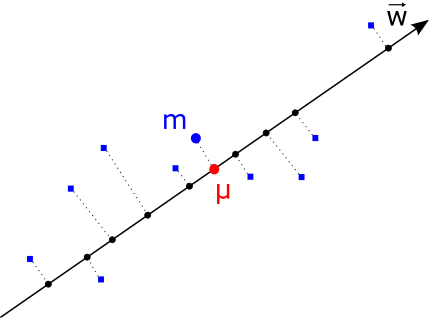



Where:
- Data: Blue squares
- m: Mean vector
- Projected data: Black dots
- μ: Projected mean vector to principal component $\vec{w}$

# **Some Maths ...**

$\vec{w_i}$: $i_{th}$ principal component.

Projected data to $i_{th}$ principal component: $z_i=w_i^TX$

Mean vector: $m=\frac{1}{N} \sum_{i=1}^{N} x_i$

Projected mean vector to $i_{th}$ principal component: $\mu_i=\frac{1}{N} \sum_{i=1}^{N} z_i=\frac{1}{N} \sum_{i=1}^{N} w_i^Tx_i=\frac{1}{N}w_i^T \sum_{i=1}^{N} x_i=w_i^Tm$

Variance of projected data: $E[(Z-\mu)^2]=E[(w_i^TX-w_i^Tm)^2]=E[(w_i^TX-w_i^Tm)(w_i^TX-w_i^Tm)^T]=w_i^TE[(X-\mu)(X-\mu)^T]w_i=w_i^T\Sigma w_i$

**1st Principal Component**

Optimization Objective: $argmax \ var(z_i) = argmax \ w_1^T\Sigma w_1$

s.t. $w_1^Tw_1=1 \Leftrightarrow w_1^Tw_1-1=0 \Leftrightarrow g(x)=0$, where $g(x)=w_1^Tw_1-1$

Langrange Mutipliers:

$\mathcal{L(w_1,\alpha)}=w_i^T\Sigma w_i-\alpha g(x)=w_1^T\Sigma w_1-\alpha (w_1^Tw_1-1)$

$\frac{\partial L}{\partial w_1}=2\Sigma w_1 - 2 \alpha w_1=0 \Leftrightarrow \Sigma w_1= \alpha w_1 \ (1)$ $\rightarrow$ **Eigenvalue problem!**

$w_1$ is an eigenvector of the covariance matrix with eigenvalue $\alpha$.

Multiplying (1) with $w_1^T$ gives:

$w_1^T\Sigma w_1=w_1^Tw_1 \alpha \Leftrightarrow w_1^T\Sigma w_1 = \alpha $

The variance along principal component $w_1$ is equal to the eigenvalue $\alpha$. Considering that we want to maximize the variance, $w_1$ is the eigenvector corresponding to the largest eigenvalue $\lambda_1$.

**2nd Principal Component**

The second principal component must maximize the projected variance $w_2^T\Sigma w_2$, such that the covariance along $w_1$ and $w_2$ is zero (uncorrelated):

$cov(z_1,z_2)=E[(z_1-\mu_1)(z_2-\mu_2)]=E[(w_1^TX-w_1^Tm)(w_2^TX-w_2^Tm)]=E[(w_1^TX-w_1^Tm)(w_2^TX-w_2^Tm)]=w_1^TE[(X-m)(X-m)^T]w_2=w_1^T \Sigma w_2=w_2^T \Sigma w_1 = w_2^T \alpha w_1=\alpha w_2^T w_1$

Optimization Objective: $argmax \ var(z_2) = argmax \ w_2^T\Sigma w_2$

s.t. $w_2^Tw_2=1$ & $w_2^T w_1=0$ $\rightarrow$ $g(x)=w_2^Tw_2-1, h(x)=w_2^T w_1$

Langrange Mutipliers:

$\mathcal{L(w_1,w_2,\alpha,\beta)}=w_2^T\Sigma w_2-\alpha g(x)-\beta h(x)=w_2^T\Sigma w_2-\alpha (w_2^Tw_2-1)-\beta w_2^T w_1 $

$\frac{\partial L}{\partial w_2}=2\Sigma w_2 - 2 \alpha w_2 - \beta w_1=0 \ (2)$

Multiplying with $w_1^T$ and taking into account the optimization restrictions: $2w_1^T \Sigma w_2 - 2 \alpha w_1^T w_2 - \beta w_1^T w_1=0 \Leftrightarrow \beta=0 $

Substituting $\beta=0$ in (2): $\frac{\partial L}{\partial w_2}=2\Sigma w_2 - 2 \alpha w_2=0 \Leftrightarrow \Sigma w_2= \alpha w_2 \ (3) $

Multiplying (3) with $w_2^T$ gives:

$w_2^T\Sigma w_2=w_2^Tw_2 \alpha \Leftrightarrow w_2^T\Sigma w_2 = \alpha $

The variance along principal component $w_2$ is equal to the eigenvalue $\alpha$. Considering that we want to maximize the variance and the correlation restrictions, $w_2$ is the eigenvector corresponding to the second largest eigenvalue $\lambda_2$. The same concept applies for the other principal components.

Finally, we get:

$W$: The orthonormal basis vectors of the new k-dimensional space, i.e. the k eigenvectors corresponding to the k largest eigenvalues. 

Projected data: $Z=W^TX$

Reconstructed data: $X_{rec}=(W^T)^{-1}Z=WZ$

Where:
- X: $[n, m]$, data per column
- W: $[n, k]$
- m: data size
- n: number of features
- k: number of reduced features

If the data matrix contains data in rows, the same concept applies:

Projected data: $Z=XW$

Reconstructed data: $X_{rec}=ZW^T$

Where:
- X: $[m, n]$, data per row
- W: $[n, k]$






# **Singular Value Decomposition (SVD)**

In the code below, instead of an eigenvalue decomposition of the covariance matrix, I chose to perform a singular value decomposition. I find this to be a more elegant way to compute the eigenvectors and eigenvalues of the covariance matrix. 

- *The $SVD(X)$ gives the eigenvectors of $X^T X$ (Gram matrix) and its singular values are equal to the square root of the eigenvalues of $X^T X$.* 

  Proof:

  $Eig(X) \rightarrow X = V \Lambda V^T \ (1)$

  $SVD(X) \rightarrow X = U \Sigma V^T \ (2)$

  $X^T X = V \Sigma U^T U \Sigma V^T \Leftrightarrow X^T X = V \Sigma^2 V^T \ (3)$

  $\Lambda = \Sigma ^2 \Leftrightarrow \Sigma = \sqrt{\Lambda} \ (4)$

- *The SVD of a Gram matrix is equal to the eigenvalue decomposition of that matrix.*

  Proof:

  Gram matrix of $X$: $G = X^T X \ (5)$

  $G^T G = X^T X X^T X = (X^T X) ^ 2 \ (6)$ 

  According to the previous statement the $SVD(G)$ gives the eigenvectors of $G^T G$ and its singular values are equal to the square root of the eigenvalues of $G^T G$:

  $\Sigma_G = \sqrt{\Lambda_{G^T G}} \ (7)$

  According to $(6)$ $G^T G$ has the same eigenvectors as $X^T X$ and its eigenvalues values are equal to the squared eigenvalues of $X^T X$.

  $\Lambda_{G^T G} = \Lambda_G ^2 \ (8)$

  $(7), (8) \rightarrow \Sigma_G = \Lambda_G $

From the above is concluded that the SVD decomposition of the covariance matrix is equal to its eigenvalue decomposition. 

**Eigenvalue Decompotition:**

$C=V \Lambda V^T$

Where:

- C: the covariance matrix
- $\Lambda$: the diagonal matrix of the eigenvalues
- $V$: the eigenvectors

**Singular Value Decompotition:**

$C=U \Sigma V^T$

Where:

- C: the covariance matrix
- $\Sigma$: the diagonal matrix of the singular values
- $U$: the left singular vectors
- $V$: the right singular vectors


# **The Code !!!**

In [16]:
# Packages
import matplotlib.pyplot as plt
import numpy as np

In [18]:
class pca:
    def __init__(self,X,k,Mode):
      
      #Standarize the data to compute easily the correlation matrix
      self.mu=np.mean(X, axis=0)
      self.sigma=np.std(X,axis=0)
    
      #Skip zero division
      idx=np.where(self.sigma==0)
      self.sigma[idx]=1
    
      X=(X-self.mu)/self.sigma
      
      #Compute covariance matrix
      m=np.size(X,0)
      n=np.size(X,1)
      C=(1/m)*np.dot(np.transpose(X),X)
      
      #Compute SVD of covariance to take the eigenvectors V and eigenvalues
      #lambda of the covariance matrix (read about the SVD of the covariance)
      U, S, V = np.linalg.svd(C)
      Stot=np.sum(S)
      
      #Mode=1: k equal to the number of the components
      #Mode=0: k equal to the minimum retained variance required
    
      if Mode==1:
        if k>n:
          return print('Wrong number of components',)
        else:
          Ured = [U[i] for i in range(k)]
          Sred=[S[i] for i in range(k)]
          varK=np.sum(Sred)/Stot
          nPC=k
      elif Mode==0:
        if k>1:
          return print('Wrong percentage of retained variance')
        else:
          for i in range(n):
            Sred=[S[j] for j in range(i)]
            varK=np.sum(Sred)/Stot
            if varK>k:
              break
            nPC=i+1
            Ured = [U[i] for i in range(nPC)]
      else:
        return print('Wrong Mode function argument value')
    
      X_pc=np.dot(X,np.transpose(Ured))
      X_rec=self.sigma * np.dot(X_pc,Ured) + self.mu 
    
      self.nPC=nPC
      self.X_pc=X_pc
      self.X_rec=X_rec
      self.var_n=varK
      self.C=C
      self.Ured=Ured

    def fit(self, Xfit):
      Xfit=(Xfit-self.mu)/self.sigma
      X_pc=np.dot(Xfit,np.transpose(self.Ured))
      X_rec=self.sigma * np.dot(X_pc,self.Ured) + self.mu 
      return X_pc, X_rec

In [19]:
def plot(A, title):

  plt.figure(figsize=(8, 8))
  plt.plot(A[:, 0], A[:, 1], 'o', color = 'blue')
  plt.title(title)
  plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)


def plot2(A, B, title, legend):

  plt.figure(figsize=(8, 8))
  plt.plot(A[:, 0], A[:, 1], 'o', color = 'blue')
  plt.plot(B[:, 0], B[:, 1], 'X', color = 'red')
  plt.title(title)
  plt.legend(legend, loc='upper left')
  plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
  plt.show()

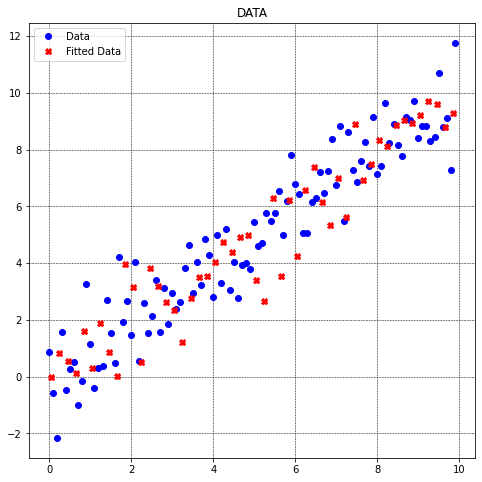

In [20]:
# Data matrix formulation
x = np.arange(start=0, stop=10, step = 0.1)
y = x + np.random.randn(x.shape[0])
xfit = np.arange(start=0.05, stop=9.95, step = 0.2)
yfit = xfit + np.random.randn(xfit.shape[0])
X= np.append(x.reshape(-1,1), y.reshape(-1,1), axis=1)
Xfit= np.append(xfit.reshape(-1,1), yfit.reshape(-1,1), axis=1)
plot2(X, Xfit, 'DATA', ['Data', 'Fitted Data'])

In [21]:
# Perform PCA
pca_space = pca(X,1,1)
# Principal Component
Xpca = pca_space.X_pc
Xpca = np.append(Xpca.reshape(-1, 1), np.zeros(Xpca.shape), axis=1)
# Reconstructed data
Xrec = pca_space.X_rec
# Fitted data
Xpca_fit, Xrec_fit = pca_space.fit(Xfit)
Xpca_fit = np.append(Xpca_fit.reshape(-1, 1), np.zeros(Xpca_fit.shape), axis=1)

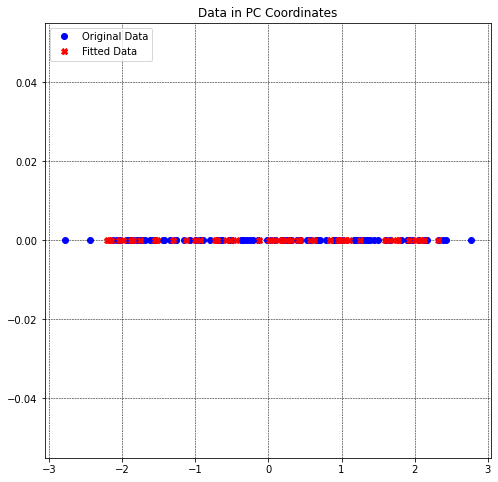

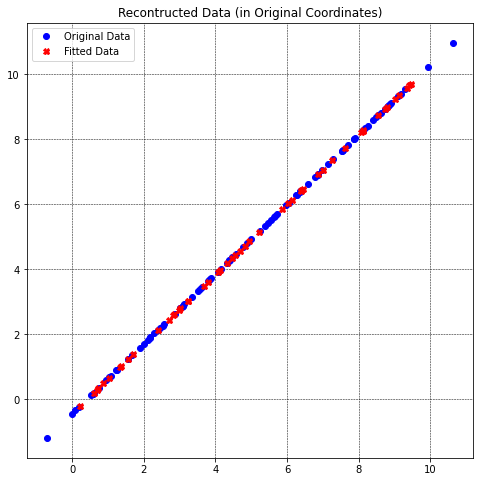

In [23]:
plot2(Xpca, Xpca_fit, 'Data in PC Coordinates', ['Original Data', 'Fitted Data'])
plot2(Xrec, Xrec_fit, 'Recontructed Data (in Original Coordinates)', ['Original Data', 'Fitted Data'])